<a href="https://colab.research.google.com/github/Mrinalkumar1/Machine-Learning-Project/blob/main/Ship%20resistance%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

**Title of Project :  “
Prediction of Ship Resistance using Polynomial Regression in Machine Learning for Given Dataset**

Description of the variables : 

Speed : Ship speed (in knots)

Draft : It is the distance between the ship’s keel(lower most point) and the waterline (the visible waterline) of the vessel (in metre).

Trim: Trim can be defined as the difference between the forward and the aft draft (in metre)

Resistance : It is the opposing force (in kN) when the ship is moving in the forward direction at its corresponding speed.

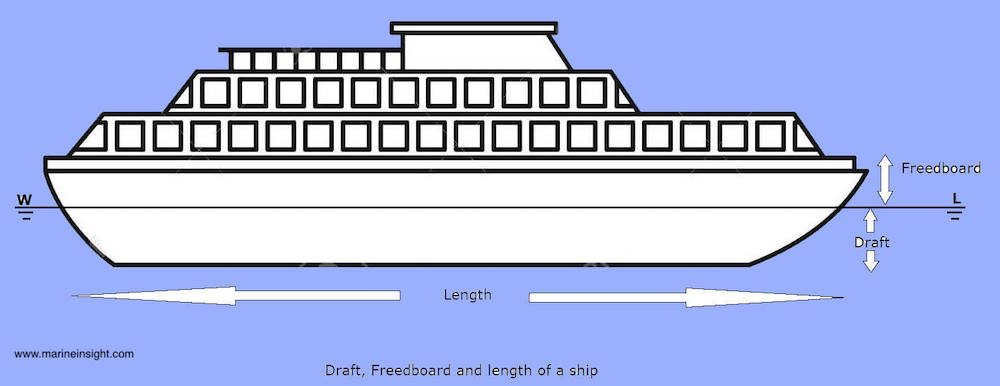

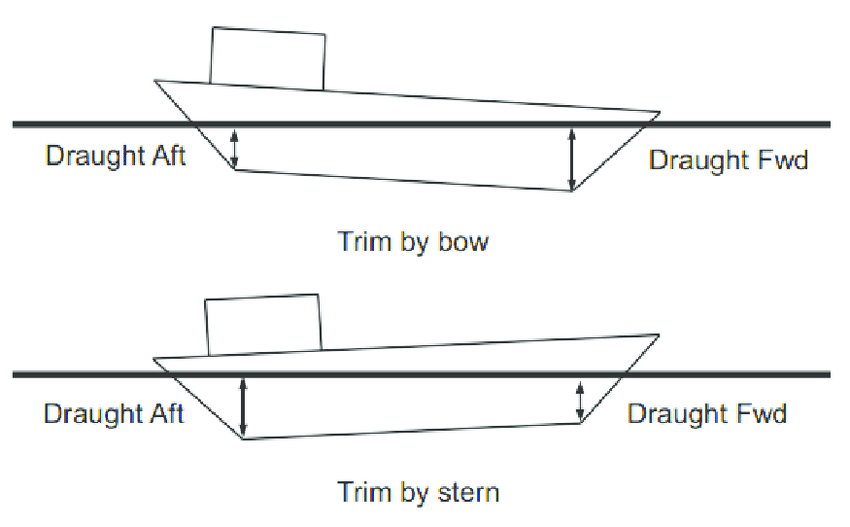

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Training Dataset (IRS).csv')
df_test = pd.read_csv('/content/drive/My Drive/Software Data Testing.csv')

In [ ]:
df.head()

,speed,draft,trim,resistance,Unnamed: 4
0,15,7.5,0.0,514.52,Trim Variation at Constant Speed & Constant Draft
1,15,7.5,1.5,500.17,NaN
2,15,7.5,1.5,500.17,NaN
3,15,7.5,2.5,474.60,NaN
4,15,8.5,0.0,546.13,NaN


In [ ]:
df_test.head()

,Speed,Draft,Trim,Resistance
0,12,8.0,1.5,331.89
1,12,9.0,1.0,351.53
2,12,10.0,1.0,369.56
3,12,11.0,2.0,374.05
4,13,9.5,0.0,423.29


In [ ]:
df.drop(['Unnamed: 4'], axis=1, inplace=True)

# Dropping of the columns

In [ ]:
df.corr()

# Checking the correlation between columns. 
# The target (resistance) has high correlation with speed.

,speed,draft,trim,resistance
speed,1.000000,0.000000,0.000000,0.959007
draft,0.000000,1.000000,0.002698,0.237642
trim,0.000000,0.002698,1.000000,0.062749
resistance,0.959007,0.237642,0.062749,1.000000


In [ ]:
df_test.corr()

,Speed,Draft,Trim,Resistance
Speed,1.000000,0.125290,0.045241,0.976957
Draft,0.125290,1.000000,0.263310,0.287863
Trim,0.045241,0.263310,1.000000,0.173814
Resistance,0.976957,0.287863,0.173814,1.000000


The correlation suggests that, there is high correlation between Resistance and Speed.

Moreover, it can also be understood that resistance is having a slight correlation between draft as well. 

In [ ]:
sns.set_style(style='whitegrid')

In [ ]:
df.describe()

# To understand the data and see if there is any possibility of having an outlier.

,speed,draft,trim,resistance
count,36.00000,36.000000,36.000000,36.000000
mean,15.00000,9.833333,1.361111,564.957222
std,2.34216,1.851640,0.953273,176.778501
min,11.00000,7.500000,0.000000,238.310000
25%,15.00000,7.500000,0.000000,510.932500
50%,15.00000,10.000000,1.500000,576.500000
75%,15.00000,11.500000,2.500000,618.917500
max,19.00000,12.500000,2.500000,971.200000


In [ ]:
df_test.describe()

,Speed,Draft,Trim,Resistance
count,27.000000,27.000000,27.000000,27.000000
mean,14.888889,10.500000,1.396296,586.005185
std,1.987138,1.467599,0.636989,156.945772
min,12.000000,8.000000,0.000000,331.890000
25%,13.000000,9.500000,1.000000,471.435000
50%,15.000000,10.500000,1.500000,564.380000
75%,16.500000,11.500000,2.000000,717.835000
max,18.000000,12.500000,2.500000,857.450000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   speed       36 non-null     int64  
 1   draft       36 non-null     float64
 2   trim        36 non-null     float64
 3   resistance  36 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.2 KB


In [ ]:
df.isnull().sum()

# Checking for null values

speed         0
draft         0
trim          0
resistance    0
dtype: int64

In [ ]:
df_test.isnull().sum()

Speed         0
Draft         0
Trim          0
Resistance    0
dtype: int64

In [ ]:
df['speed'].unique()

array([15, 11, 19])

In [ ]:
df['draft'].unique()

array([ 7.5,  8.5,  9.5, 10.5, 11.5, 12.5])

In [ ]:
df['trim'].unique()

array([0. , 1.5, 2.5])

In [ ]:
df['resistance'].unique()

array([514.52, 500.17, 474.6 , 546.13, 550.41, 541.76, 551.3 , 581.2 ,
       581.9 , 542.63, 576.5 , 598.89, 544.12, 580.9 , 618.14, 581.5 ,
       621.25, 671.3 , 288.1 , 880.19, 303.  , 925.  , 318.2 , 971.2 ,
       248.3 , 792.8 , 242.31, 778.  , 238.31, 765.4 ])

In [ ]:
a = df['resistance'].mean()
b = df['resistance'].min()
c = df['resistance'].max()
print("mean = ", a,"\n" "min = ", b,"\n" "max = ", c)

mean =  564.9572222222223 
min =  238.31 
max =  971.2




speed
Skew =  0.0




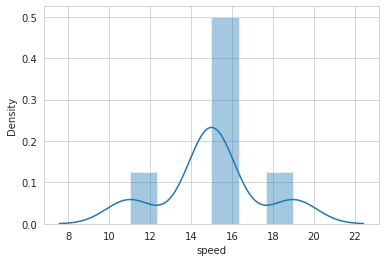



draft
Skew =  -0.06085806194501945




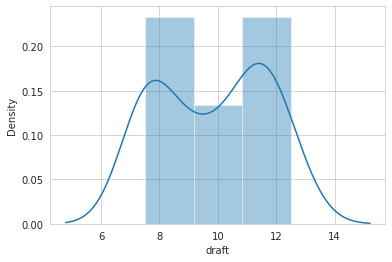



trim
Skew =  -0.347921816556485




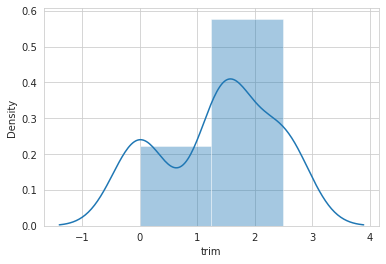



resistance
Skew =  0.10751402214243626




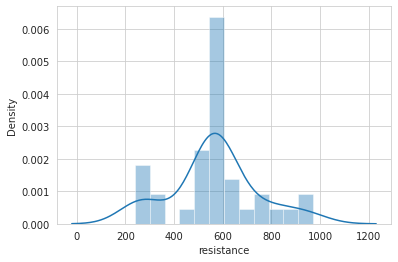

In [ ]:
from scipy.stats import skew
for col in df:
  print("\n")
  print(col)
  print("Skew = ", skew(df[col]))
  sns.distplot(df[col])
  print("\n")
  plt.show()

  # Data is normally distributed 

The above data is normally distributed




Speed
Skew =  0.03626018341897514




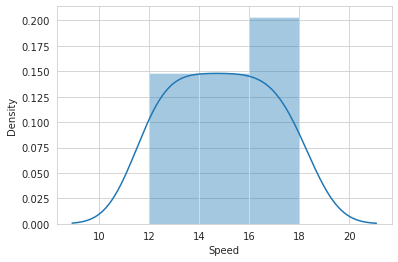



Draft
Skew =  -0.12089391927833541




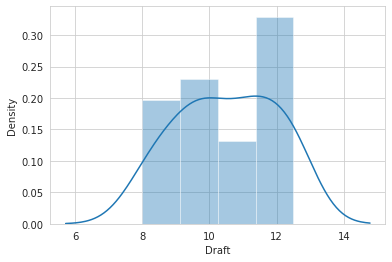



Trim
Skew =  -0.27899221128858576




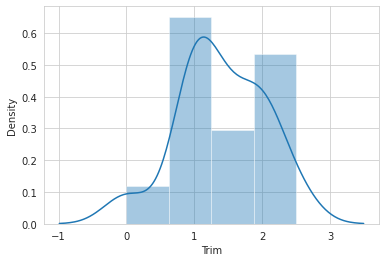



Resistance
Skew =  0.0700068928796112




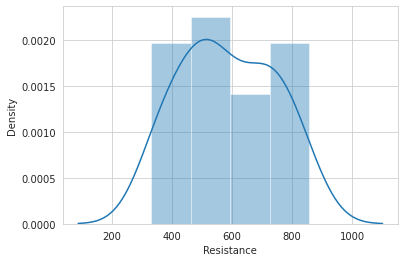

In [ ]:
for col in df_test:
  print("\n")
  print(col)
  print("Skew = ", skew(df_test[col]))
  sns.distplot(df_test[col])
  print("\n")
  plt.show()

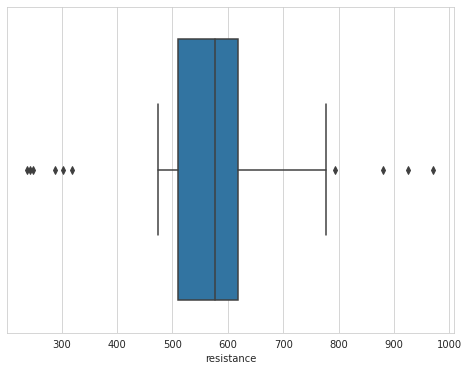

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='resistance')
plt.show()

# Checking outliers. As we can see there are couple of outliers. 

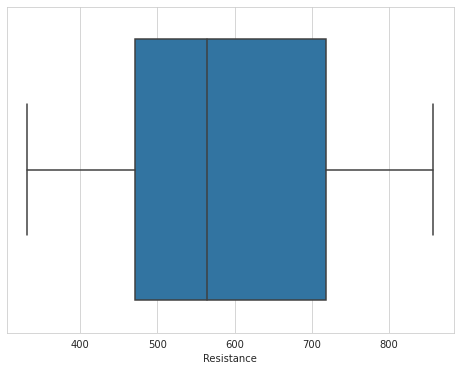

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_test, x='Resistance')
plt.show()

In [ ]:
df.describe()

,speed,draft,trim,resistance
count,36.00000,36.000000,36.000000,36.000000
mean,15.00000,9.833333,1.361111,564.957222
std,2.34216,1.851640,0.953273,176.778501
min,11.00000,7.500000,0.000000,238.310000
25%,15.00000,7.500000,0.000000,510.932500
50%,15.00000,10.000000,1.500000,576.500000
75%,15.00000,11.500000,2.500000,618.917500
max,19.00000,12.500000,2.500000,971.200000


In [ ]:
lw = 510.93 - (618.91-510.93)*1.5
uw = 510.93 + (618.91-510.93)*1.5
lw, uw

# Finding the exact point to check the outliers. 

(348.96000000000004, 672.9)

In [ ]:
df[df['resistance'] < 348.95]

# 6 outliers before lw.

,speed,draft,trim,resistance
24,11,11.5,0.0,288.10
26,11,11.5,1.5,303.00
28,11,11.5,2.5,318.20
30,11,7.5,0.0,248.30
32,11,7.5,1.5,242.31
34,11,7.5,2.5,238.31


In [ ]:
df[df['resistance'] > 673]

# 6 outliers after uw. 
# Since out dataset is small and number of outliers are huge in comparison we won't be getting rid of the outliers. 

,speed,draft,trim,resistance
25,19,11.5,0.0,880.19
27,19,11.5,1.5,925.00
29,19,11.5,2.5,971.20
31,19,7.5,0.0,792.80
33,19,7.5,1.5,778.00
35,19,7.5,2.5,765.40


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Training dataset
x_train = df.drop('resistance', axis=1)
y_train = df['resistance']

# Testing dataset
x_test = df_test.drop('Resistance', axis=1)
y_test = df_test['Resistance']

lr = LinearRegression()
lr.fit(x_train, y_train)
y_hat = lr.predict(x_test)
y_hat1 = lr.predict(x_train)
print("Slope = {} \n Intercept = {}".format(lr.coef_, lr.intercept_))

lr.fit(x_train, y_train)
lr.score(x_test, y_test)

# Linear regression is giving us a good score now lets move onto polynomial regression.

Slope = [72.38270833 22.67203116 11.51756141] 
 Intercept = -759.4017233704392


0.9764147879845413

In [ ]:
df_new1 = pd.DataFrame({'speed':18,
                       'draft':10,
                       'trim':2.5}, index=[0])

lr.predict(df_new1)

array([799.0012418])

In [ ]:
from sklearn.metrics import r2_score

y_hat = lr.predict(x_test)
y_hat1 = lr.predict(x_train)
print("Bias = ", r2_score(y_train, y_hat1))
print("Variance = ", r2_score(y_test, y_hat))

# Since Variance < Bias there is need for regularization. 

Bias =  0.9800265522240258
Variance =  0.9764147879845412


In [ ]:
from sklearn.linear_model import Ridge, Lasso

In [ ]:
l2 = Ridge(0.05)
l2.fit(x_train, y_train)
print(l2.coef_)

[72.36386358 22.66261345 11.49953289]


In [ ]:
for i in range(1, 5):
  l2 = Ridge(i)
  l2.fit(x_train, y_train)
  print(i, "Bias = ", r2_score(y_train, y_hat1))
  print(i, "Variance = ", r2_score(y_test, y_hat))
  print("\n")  

1 Bias =  0.9800265522240258
1 Variance =  0.9764147879845412


2 Bias =  0.9800265522240258
2 Variance =  0.9764147879845412


3 Bias =  0.9800265522240258
3 Variance =  0.9764147879845412


4 Bias =  0.9800265522240258
4 Variance =  0.9764147879845412




In [ ]:
print(y_test)
print(y_hat)
print(y_hat1)

0     331.89
1     351.53
2     369.56
3     374.05
4     423.29
5     439.90
6     460.57
7     482.30
8     519.34
9     543.82
10    527.85
11    485.94
12    581.55
13    608.00
14    530.07
15    564.38
16    676.07
17    696.78
18    707.27
19    654.66
20    737.26
21    771.57
22    818.32
23    753.60
24    857.45
25    826.72
26    728.40
Name: Resistance, dtype: float64
[307.84336806 324.75661852 347.42864969 381.61824226 396.95778103
 425.57013872 465.33696617 482.25021663 537.53812868 551.17765655
 526.38365893 463.94480031 564.75832051 621.2568526  519.23271236
 541.90474352 648.47704443 676.9078563  699.39834163 670.96752977
 720.67820693 754.86779951 777.53983067 698.00617577 799.0012418
 815.73294643 736.19929153]
[496.37913536 513.65547748 513.65547748 525.17303889 519.05116653
 536.32750864 536.32750864 547.84507005 541.72319769 558.99953981
 558.99953981 570.51710122 564.39522886 581.67157097 581.67157097
 593.18913238 587.06726002 604.34360214 604.34360214 615.8611

In [ ]:
df_new = pd.DataFrame(y_test)
df_new['New_resistance'] = y_hat
df_new
df_new.to_csv('Testing.csv')

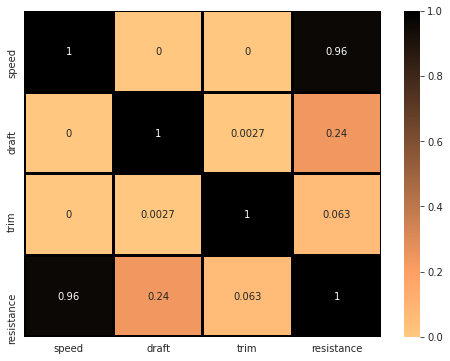

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='copper_r', linecolor='black', linewidths=2)
plt.show()

# Multicolinearity - pass

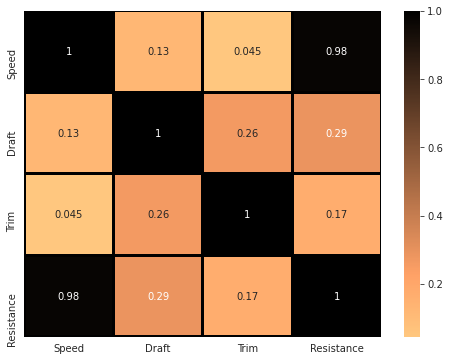

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df_test.corr(), annot=True, cmap='copper_r', linecolor='black', linewidths=2)
plt.show()

Skew =  0.3986849177317496


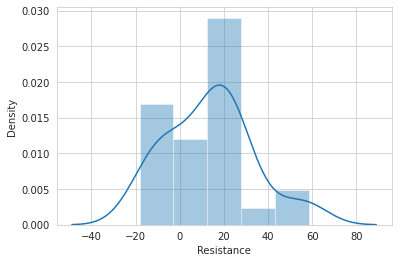

In [ ]:
residuals = y_test - y_hat
print("Skew = ", skew(residuals))
sns.distplot(residuals)
plt.show()

# Normal distribution - pass

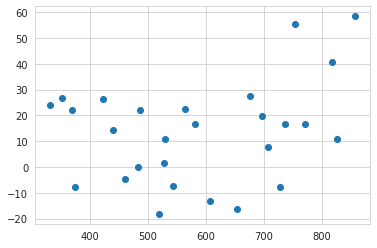

In [ ]:
plt.scatter(y_test, residuals)
plt.show()

# Hetroskedastial

In [ ]:
from sklearn.preprocessing import PolynomialFeatures


In [ ]:
pf = PolynomialFeatures(degree=2)

x_trn = df.drop('resistance', axis=1)
y_trn = df['resistance']

x_tst = df_test.drop('Resistance', axis=1)
y_tst = df_test['Resistance']

x_poly_trn2 = pf.fit_transform(x_trn)
x_poly_tst2 = pf.fit_transform(x_tst)


lr_poly2 = LinearRegression()
lr_poly2.fit(x_poly_trn2, y_trn)

y_hat = lr_poly2.predict(x_poly_tst2)
y_hat1 = lr_poly2.predict(x_poly_trn2)
print("Slope = {} \n Intercept = {}".format(lr_poly2.coef_, lr_poly2.intercept_))
print("R2_score = ", lr_poly2.score(x_poly_tst2, y_tst))
residuals = y_tst - y_hat

Slope = [ 0.00000000e+00  2.42855153e+01  1.97241897e+01 -9.26398628e+01
  6.98625276e-01  2.70635417e+00  1.07105263e+00 -2.52955767e+00
  8.97885223e+00  7.42886069e-02] 
 Intercept = -316.552229884883
R2_score =  0.98776272945413


In [ ]:
df_new2 = pd.DataFrame({'Speed':[15,16,17,18,19],
                       'Draft':[7.5,7.5,7.5,7.5,7.5],
                       'Trim':[1.5,1.5,1.5,1.5,1.5],
                        }, index=[0,1,2,3,4])

u = pf.transform(df_new2)
r2 = print(lr_poly2.predict(u))
r2

[501.34796135 569.1950954  638.43947999 709.08111514 781.12000085]


In [ ]:
print("Bias = ", r2_score(y_trn, y_hat1))
print("Variance = ", r2_score(y_tst, y_hat))

# Bias > Variance, Need regularization

Bias =  0.9948670954121394
Variance =  0.98776272945413


In [ ]:
print(y_tst)
print(y_hat)
print(y_hat1)

0     331.89
1     351.53
2     369.56
3     374.05
4     423.29
5     439.90
6     460.57
7     482.30
8     519.34
9     543.82
10    527.85
11    485.94
12    581.55
13    608.00
14    530.07
15    564.38
16    676.07
17    696.78
18    707.27
19    654.66
20    737.26
21    771.57
22    818.32
23    753.60
24    857.45
25    826.72
26    728.40
Name: Resistance, dtype: float64
[319.42034961 341.48250713 354.60020336 381.86179333 410.54910291
 430.11497744 463.49966702 458.76503912 517.65240001 526.91211106
 530.58534047 465.50658154 567.41107818 599.40744672 520.9165467
 547.21242077 657.03504003 696.69721607 698.71000211 668.95550073
 729.42898162 777.53747404 800.51800498 705.30907223 819.90483602
 829.42130118 745.90889341]
[515.02983445 501.34796135 501.34796135 492.41243413 534.87641396
 534.6628192  534.6628192  534.70614421 549.66387813 562.91856171
 562.91856171 571.94073896 559.39222696 586.11518889 586.11518889
 604.11621836 564.06146046 604.25270073 604.25270073 631.2325

In [ ]:
df_new1 = pd.DataFrame(y_tst)
df_new1['New_resistance'] = y_hat
df_new1
df_new1.to_csv('Testing_polynomial2.csv')

Skew_poly2 =  0.4980898092426797


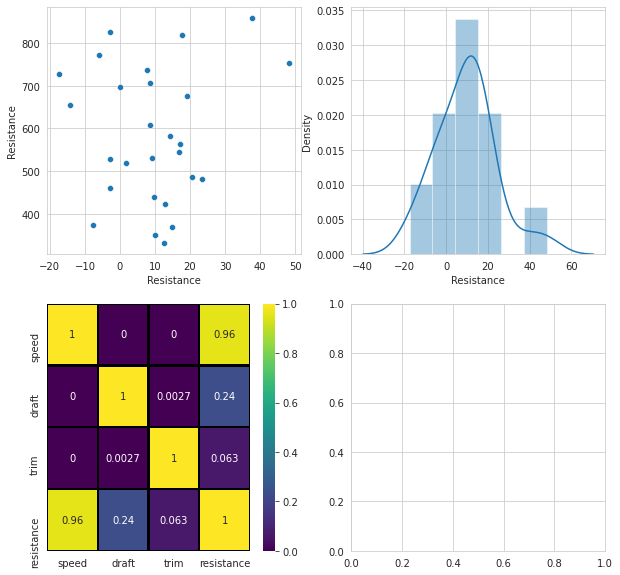

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(10,10))

sns.scatterplot(residuals, y_tst, ax = axes[0][0])
print("Skew_poly2 = ", skew(residuals))
sns.distplot(residuals, ax = axes[0][1])
sns.heatmap(df.corr(), annot=True, cmap="viridis", linewidths=1.2, linecolor='black', ax=axes[1][0])
plt.show()

# Not homoskedastial
# Multicolinearity - pass
# Normal distribution - pass / Skew (-0.5 to 0.5)

In [ ]:
pf3 = PolynomialFeatures(degree=3)

x_trn = df.drop(['resistance'], axis=1)
y_trn = df['resistance']

x_tst = df_test.drop(['Resistance'], axis=1)
y_tst = df_test['Resistance']

x_poly_trn3 = pf3.fit_transform(x_trn)
x_poly_tst3 = pf3.fit_transform(x_tst)


lr_poly3 = LinearRegression()
lr_poly3.fit(x_poly_trn3, y_trn)

y_hat = lr_poly3.predict(x_poly_trn3)
y_hat1 = lr_poly3.predict(x_poly_tst3)
print("Slope = {} \n Intercept = {}".format(lr_poly3.coef_, lr_poly3.intercept_))
print("R2_score = ", lr_poly3.score(x_poly_tst3, y_tst))
residuals1 = y_tst - y_hat1

Slope = [ 0.00000000e+00 -1.28792004e+00  2.43163013e+00  1.08844417e+01
 -1.88519425e+01  7.06558664e+01 -7.81089872e+00 -5.09699726e+01
  1.44872082e+00  8.06954316e+00  4.01895158e-01  2.37863735e-01
 -2.64561539e-02 -4.01961143e+00  9.65394737e-01  2.08333333e-01
  3.67145833e+00 -6.44421196e-01  2.34129615e+00 -8.53848366e+00] 
 Intercept = -247.67120887848864
R2_score =  0.9742663803367857


In [ ]:
df_new3 = pd.DataFrame({'Speed':[15,16,17,18,19],
                       'Draft':[7.5,7.5,7.5,7.5,7.5],
                       'Trim':[1.5,1.5,1.5,1.5,1.5],
                        }, index=[0,1,2,3,4])

x3 = pf3.transform(df_new3)
r3 = lr_poly3.predict(x3)
r3

array([498.79233494, 560.36265932, 626.29962133, 699.01459189,
       780.91894195])

In [ ]:
#Original dataset values are taken. 

df_new4 = pd.DataFrame({'Speed':[15,15,15,15],
                       'Draft':[7.5,7.5,7.5,7.5],
                       'Trim':[0,1,1.5,2.5],
                        }, index=[0,1,2,3])

x4 = pf3.transform(df_new4)
r4 = lr_poly3.predict(x4)
r4

array([506.42470055, 497.63242924, 498.79233494, 480.20491529])

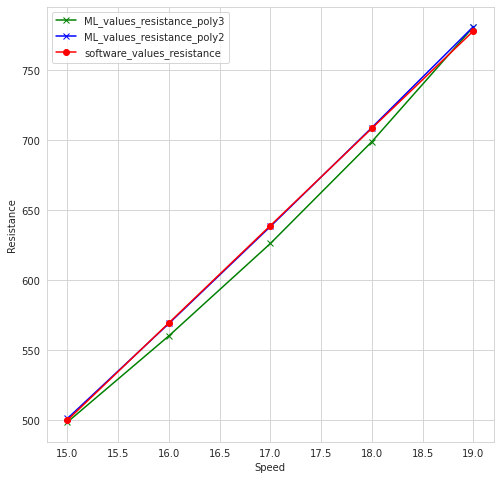

In [ ]:
# Final model graph
plt.figure(figsize=(8,8))

speed = [15,16,17,18,19]
ML_values_resistance1 = [501.34796135, 569.1950954,  638.43947999, 709.08111514, 781.12000085]
ML_values_resistance = r3
software_values_resistance = [500.17, 569.63, 639.09, 708.54, 778]

plt.plot(speed, ML_values_resistance, 'gx-')
plt.plot(speed, ML_values_resistance1, 'bx-')
plt.plot(speed, software_values_resistance, 'ro-')
plt.legend(labels=['ML_values_resistance_poly3', 'ML_values_resistance_poly2', 'software_values_resistance'])
plt.xlabel("Speed")
plt.ylabel("Resistance")
plt.show()

In [ ]:
"""plt.figure(figsize=(8,8))
R = []
R_original_dataset = float(input("Enter 4 resistances from the original training dataset comma separated = "))
R_original_dataset.strip()
if not R_original_dataset == "" or not R_original_dataset is none or not R_original_dataset == " ":
            R.extend(R_original_dataset.split(","))
print(R)
T = []
R_testing_dataset = float(input("Enter a resistance from the original testing dataset = "))
T.append(R_testing_dataset)
R_poly3 = x5
R_software_values = [500,540,580,620]
s = []
speed = float(input("Enter the speed from the dataset : "))
s.append(speed)
plt.plot(s, R_original_dataset, 'cx-')
plt.plot(s, R_testing_dataset, 'co-')
plt.plot(s, R_poly3, 'go-')
plt.plot(s, R_software_values, 'rx-')
plt.show()"""

'plt.figure(figsize=(8,8))\nR = []\nR_original_dataset = float(input("Enter 4 resistances from the original training dataset comma separated = "))\nR_original_dataset.strip()\nif not R_original_dataset == "" or not R_original_dataset is none or not R_original_dataset == " ":\n            R.extend(R_original_dataset.split(","))\nprint(R)\nT = []\nR_testing_dataset = float(input("Enter a resistance from the original testing dataset = "))\nT.append(R_testing_dataset)\nR_poly3 = x5\nR_software_values = [500,540,580,620]\ns = []\nspeed = float(input("Enter the speed from the dataset : "))\ns.append(speed)\nplt.plot(s, R_original_dataset, \'cx-\')\nplt.plot(s, R_testing_dataset, \'co-\')\nplt.plot(s, R_poly3, \'go-\')\nplt.plot(s, R_software_values, \'rx-\')\nplt.show()'

Skew_poly3 =  -1.1590477899081155




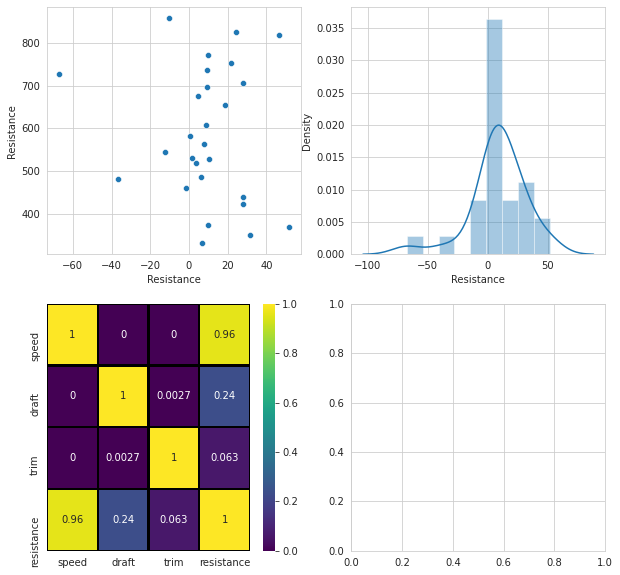

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(10,10))

sns.scatterplot(residuals1, y_tst, ax = axes[0][0])
print("Skew_poly3 = ", skew(residuals1))
print("\n")
sns.distplot(residuals1, ax = axes[0][1])
sns.heatmap(df.corr(), annot=True, cmap="viridis", linewidths=1.2, linecolor='black', ax=axes[1][0])
plt.show()

# homoskedastial
# Multicolinearity - pass
# Normal distribution - pass / Skew (-0.5 to 0.5)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.svm import LinearSVR, SVR

In [ ]:
# K NEIGHBORS REGRESSOR

x_train = df.drop('resistance', axis=1)
y_train = df['resistance']

x_test = df_test.drop('Resistance', axis=1)
y_test = df_test['Resistance']

for k in range(1,10):
  knn = KNeighborsRegressor(n_neighbors=k)
  knn.fit(x_train, y_train)
  print(k,":", knn.score(x_test, y_test))

# This model cannot be considered since r2 score is low. 

1 : 0.5220893319742015
2 : 0.5411806915592674
3 : 0.5487755361305982
4 : 0.6397164839939513
5 : 0.6326658660891891
6 : 0.6348760412690716
7 : 0.6521286619973495
8 : 0.6673346332323369
9 : 0.6234360267907966


The step undertaken is just to show the effect of using K Neighbors Regressor. However, we cannot use this model as it is used because the R2 scores are low.

0.4634672515656258


[Text(136.96363636363637, 199.32, 'speed <= 13.0\nmse = 30382.565\nsamples = 36\nvalue = 564.957'),
 Text(50.727272727272734, 163.07999999999998, 'draft <= 9.5\nmse = 987.734\nsamples = 6\nvalue = 273.037'),
 Text(20.290909090909093, 126.83999999999999, 'trim <= 0.75\nmse = 16.853\nsamples = 3\nvalue = 242.973'),
 Text(10.145454545454546, 90.6, 'mse = 0.0\nsamples = 1\nvalue = 248.3'),
 Text(30.436363636363637, 90.6, 'trim <= 2.0\nmse = 4.0\nsamples = 2\nvalue = 240.31'),
 Text(20.290909090909093, 54.359999999999985, 'mse = 0.0\nsamples = 1\nvalue = 242.31'),
 Text(40.581818181818186, 54.359999999999985, 'mse = -0.0\nsamples = 1\nvalue = 238.31'),
 Text(81.16363636363637, 126.83999999999999, 'trim <= 2.0\nmse = 151.007\nsamples = 3\nvalue = 303.1'),
 Text(71.01818181818183, 90.6, 'trim <= 0.75\nmse = 55.503\nsamples = 2\nvalue = 295.55'),
 Text(60.872727272727275, 54.359999999999985, 'mse = 0.0\nsamples = 1\nvalue = 288.1'),
 Text(81.16363636363637, 54.359999999999985, 'mse = 0.0\nsamp

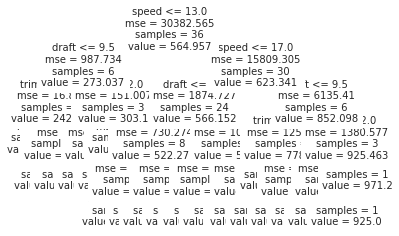

In [ ]:
# DECISION TREE REGRESSOR

x_train = df.drop('resistance', axis=1)
y_train = df['resistance']

x_test = df_test.drop('Resistance', axis=1)
y_test = df_test['Resistance']


dtr = DecisionTreeRegressor(max_depth=5)
dtr.fit(x_train, y_train)
print(dtr.score(x_test, y_test))

tree.plot_tree(dtr.fit(x_train, y_train), feature_names=list(df), fontsize=10)

# This model cannot be considered since r2 score is low. 

The step undertaken is just to show the effect of using DECISION TREE REGRESSOR. However, we cannot use this model as it is used because the R2 scores are low.

In [ ]:
# SVR - SUPPORT VECTOR REGRESSOR 


In [ ]:
x_train = df.drop('resistance', axis=1)
y_train = df['resistance']

x_test = df_test.drop('Resistance', axis=1)
y_test = df_test['Resistance']

svr = LinearSVR()  #Kernel - Linear, Hard margin
svr.fit(x_train, y_train)
print("SVR Linear :", svr.score(x_test, y_test))

SVR Linear : 0.6435434852425048


The linear SVR is not supporting the SVR score (low) = 0.64
Therefore, we are going for polynomial degree 3 

In [ ]:
x_train = df.drop('resistance', axis=1)
y_train = df['resistance']

x_test = df_test.drop('Resistance', axis=1)
y_test = df_test['Resistance']

svr = SVR(kernel='poly', degree=3, C=5)  #Kernel - Poly  degree = 3, Soft margin = C
svr.fit(x_train, y_train)
print("SVR Polynomial(3) :", svr.score(x_test, y_test))

SVR Polynomial(3) : 0.9647401173490324


We may use SVR polynomial (deg. 3 and softmargin (c) = 5. Which might not prove to be the best model to be used for predicting the target variable.

In [ ]:
x_train = df.drop('resistance', axis=1)
y_train = df['resistance']

x_test = df_test.drop('Resistance', axis=1)
y_test = df_test['Resistance']

svr = SVR(kernel='rbf', C=6)  #Kernel - Radial, Soft margin
svr.fit(x_train, y_train)
print("SVR Radial :", svr.score(x_test, y_test))

SVR Radial : 0.11072180402467446


The above SVR radial was also not supporting the desired output.

**Inferences**

1)The dataset was small and had no prerequisites to do Exploratory Data Analysis(EDA). However, a detailed self study and discussion was carried out to understand the relationship between the target and the dependent vairiables.


    1.a The relationship between Resistance (target) and the speed is highly correlated (0.95 aproxx.).
    
     The literature avaialable also established the same relationship in the form of a graph as displayed below



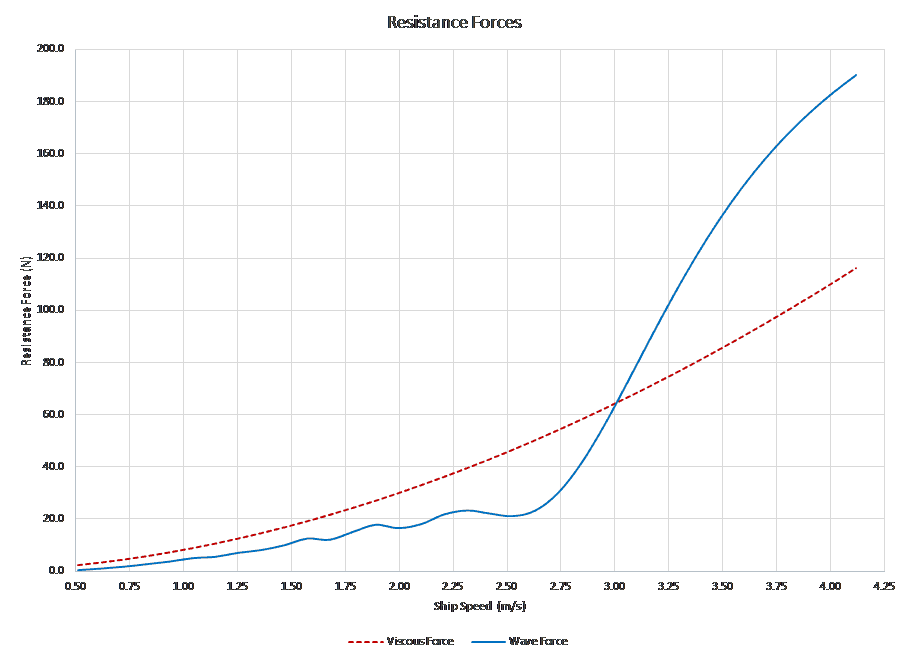

reference : https://dmsonline.us/ship-model-scaling/

**Reference continued :

Summary of all model scores and comparison of results

1 ) Linear R2 score = 0.97 : Remarks - Not choosing this model as the relationship between target and prime dependent variable is non-linear.

2) Polynomial deg 2 R2 score = 0.979 : Remarks - could be taken as a final model as all tests passed , checking for higher degree

3) Polynomial deg 3 R2 score = 0.963 : Remarks - could be taken as a final model as all tests passed , checking for higher degree

3) KNN regressor - R2 score = 0.652 n_neighbors = 7 (low R2 score)

4) Decision Tree Regressor - R2 score = 0.463 (low R2 score)

5) SV Regressor - Linear R2 score = 0.644 ,hard margin, c =0

6) SV Regressor - Polynomial deg 3, soft margin, c= 5, R2 score = 0.96 (not acceptable due to C=5, for C=1 R2 score was dropping to 0.9)

7) Support Vector Radial R2 score = 0.11 even with high soft margin

**



**Conclusion**

Poly deg 2 was selected for the best results.

Slope(poly2) = [ 0.         26.64451981 30.74405329  0.66759413  2.70635417 -2.4696454 ] 
Intercept = -442.95037890823824



Thank you

Happy Learners (ML group)